In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

In [5]:
#Load dữ liệu
iris = load_iris()
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


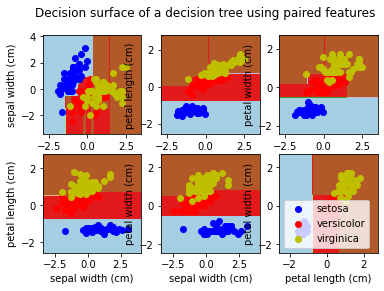

In [7]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    #Only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    #Shuffle
    idx = np.arange(X.shape[0])    #Returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)
    np.random.shuffle(idx)   #Shuffle in place based on the seeded randomization
    
    X = X[idx]    #Re-sort X randomly based on IDX as indices
    y = y[idx]
    
    #Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std    #Normalize to a "Normal distribution"
    
    #Train
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    
    #Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    #Ravel create a 1D view of the vector
    #c_ concatenates 1D vector into columns of a 2D array, basically
    #making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    #Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                    label=iris.target_names[i], cmap=plt.cm.Paired)
    plt.axis("tight")
    
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()
    